# Title: Final_Report

### Group members:
* Audrey Wang 41935289
* Sam Shan 85179604
* Dima Zubkovskii 61142865
* Michelle Sui 93853489

# Introduction

Diabetes is a chronic (long-lasting) health condition that affects how body turns food into energy. Body breaks down most of the food people eat into sugar (glucose) and releases it into the bloodstream. When the blood sugar goes up, it signals the pancreas to release insulin. Insulin acts like a key to let the blood sugar into the body’s cells for use as energy. However, with diabetes, patient's body doesn’t make enough insulin or can’t use it as well as it should. Moreover, gestational diabetes develops in pregnant women who have never had diabetes. If a patient have gestational diabetes, their baby could be at higher risk for health problems. Gestational diabetes usually goes away after your baby is born. However, it increases a patient's risk for type 2 diabetes later in life. (Center for Disease Control and Prevention, 2023) 

Early diagnosis and intervention can significantly alter the course of this disease, improving the quality of life for those affected. Recognizing the critical role of timely and accurate diagnostics, our project is inspired by a dataset sourced from the National Institute of Diabetes and Digestive and Kidney Diseases. This data provides a unique opportunity to utilize machine learning for predictive analysis in a medical context.
The dataset focuses on a specific subset of the population - women of Pima Indian heritage who are 21 years or older. It includes several medical predictor variables alongside one target variable, Outcome, indicating the presence or absence of diabetes. Our project aims to leverage the capabilities of artificial intelligence and data analytics to **develop a robust model that can predict the onset of diabetes in patients based on the diagnostic measurements provided in the dataset.** By doing so, we seek not only to contribute to the advancement of medical diagnostics but also to support preventive health measures among high-risk populations.



# Data Description:

For our research, we are using the data from Kaggle, which was originally collected by the National Institute of Diabetes and Digestive and Kidney Diseases.to predict if a patient from a group of 21 years and older women of Pima Indian heritage will have diabetes based on the next factors, which can be found as columns in the original comma separated valuetable:
* **Pregnancies**: the number of times pregnant
* **Glucose**:  plasma glucose concentration
* **BloodPressure**: diastolic blood pressure (in mmHg)
* **SkinThickness**: triceps skin fold thickness (mm) 
* **Insulin**: 2-hour serum insulin (in U/ml)
* **BMI**: body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction**: diabetes pedigree function 
* **Age**: age (in years)
* **Outcome**: 0 or 1 (0 means that a patient does not have diabetes, 1 means that a patient has)

# Methods(unfinished):
## 1. Preprocessing and exploratory data analysis
1. Imported libraries and `diabetes_data` dataset from the Internet.
2. Cleaned and wrangled the data into a tidy format
3. Set the seed value
4. Split the data into training and testing sets, working only with the training set until the very end
5. Summarized the training data, visualized distribution of variables and selected resonable predictors

According to our proposal, we have found out that missing data was prevalent in two factors: insulin and skin_sickness. We have concluded that these factors cannot play a predictor role in the final analysis. In every other factors, the amount of missing data was less than 1%. we have selected the following six quantitative variables as our predictors.
* `Pregnancies`: the number of times pregnant
* `Glucose`:  plasma glucose concentration
* `BloodPressure`: diastolic blood pressure (in mmHg)
* `BMI`: body mass index (weight in kg/(height in m)^2)
* `DiabetesPedigreeFunction`: diabetes pedigree function 
* `Age`: age (in years)

## 2. Finding the best K value
1. Set up cross-validation to increase the accuracy
2. Create classification recipe and make the training data centered and scaled
3. Find the best K value by using `neighbours = tune()` in the k-nearest model function

## 3. Testing
## 4. Evaluating model's performance


# Code:
## Preliminary exploratory data analysis

## Read and import dataset from the web into R

In [80]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(recipes)
install.packages("themis")
library(themis)

also installing the dependencies ‘RANN’, ‘ROSE’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
URL <- "https://raw.githubusercontent.com/audrey-rw5683/dsci-100-2023w2-group-002-2/main/diabetes.csv"
diabetes_data <- read_csv(URL)
head(diabetes_data)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


## Clean and wrangle the data into a tidy format

### Set seed value

In [3]:
set.seed(123) #do not change the value.

In [82]:
# rename colunms to lowercase
diabetes <- rename(diabetes_data,
                 pregnancies =  Pregnancies,
                 glucose = Glucose,
                 blood_pressure = BloodPressure,
                 skin_sickness = SkinThickness,
                 insulin = Insulin,
                 bmi = BMI,
                 diabetes_pedigree_function = DiabetesPedigreeFunction,
                 age = Age,
                 outcome = Outcome)
# we will be working with outcome as a categorical variable, we will convert it to a factor using the function as_factor.
diabetes <- diabetes |>
    mutate(outcome = as_factor(outcome))

head(diabetes)

pregnancies,glucose,blood_pressure,skin_sickness,insulin,bmi,diabetes_pedigree_function,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


### Split the data
* We will use 80% of the data for training and 20% for testing.

In [83]:
diabetes_split <- initial_split(diabetes, prop = 0.8, strata = outcome)  
diabetes_train <- training(diabetes_split)   
diabetes_test <- testing(diabetes_split)
glimpse(diabetes_train)
glimpse(diabetes_test)

Rows: 614
Columns: 9
$ pregnancies                <dbl> 1, 1, 5, 10, 4, 1, 8, 1, 13, 5, 5, 10, 4, 7…
$ glucose                    <dbl> 85, 89, 116, 115, 110, 103, 99, 97, 145, 11…
$ blood_pressure             <dbl> 66, 66, 74, 0, 92, 30, 84, 66, 82, 92, 75, …
$ skin_sickness              <dbl> 29, 23, 0, 0, 0, 38, 0, 15, 19, 0, 26, 31, …
$ insulin                    <dbl> 0, 94, 0, 0, 0, 83, 0, 140, 110, 0, 0, 0, 1…
$ bmi                        <dbl> 26.6, 28.1, 25.6, 35.3, 37.6, 43.3, 35.4, 2…
$ diabetes_pedigree_function <dbl> 0.351, 0.167, 0.201, 0.134, 0.191, 0.183, 0…
$ age                        <dbl> 31, 21, 30, 29, 30, 33, 50, 22, 57, 38, 60,…
$ outcome                    <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
Rows: 154
Columns: 9
$ pregnancies                <dbl> 6, 0, 3, 2, 10, 7, 7, 3, 7, 3, 6, 11, 2, 3,…
$ glucose                    <dbl> 148, 137, 78, 197, 139, 100, 107, 126, 196,…
$ blood_pressure             <dbl> 72, 40, 50, 70, 80, 0, 74, 88, 90, 58, 92, 

### Summarize the dataset

In [84]:
#the number of observations in each class
num_obs <- nrow(diabetes_train)
diabetes_outcomes <- diabetes_train |>
                    group_by(outcome) |>
                    summarize(count = n(), percentage = n() / num_obs * 100)

diabetes_outcomes

outcome,count,percentage
<fct>,<int>,<dbl>
0,400,65.14658
1,214,34.85342


In our training set, we have 400 observations with `outcome = 0`, and 214 observations with `outcome = 1`. The number of patients without diabetes is greater than the number of patients with diabetes which causes a class imbalance, which could potentially impact the predictions of our model. We plan to incorporate oversampling method into the recipe creation process to address this issue.

In [85]:
# the means of the variables
diabetes_stat <- diabetes_train |>
    summarize(across(pregnancies:age, mean))
diabetes_stat

pregnancies,glucose,blood_pressure,skin_sickness,insulin,bmi,diabetes_pedigree_function,age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.861564,121.6221,69.60423,20.9772,79.92182,32.18844,0.4661319,33.60749


In [86]:
# the number of observations have missing values
# pregnancies can be 0
# 0 represents missing values for other numerical variables
diabetes_missing <- diabetes_train |>
    filter(glucose == 0 | blood_pressure == 0 | skin_sickness == 0 | insulin == 0 | bmi == 0 | diabetes_pedigree_function == 0 | age == 0)
head(diabetes_missing)
diabetes_missing_num <- diabetes_missing |>
  summarize(missing_count_total = n())
diabetes_missing_num
zero_counts <- diabetes_train |>
  summarize(across(pregnancies:age, ~ sum(. == 0))) |> pivot_longer(cols = glucose:age, names_to = "variable", values_to = "count_missing")
zero_counts

pregnancies,glucose,blood_pressure,skin_sickness,insulin,bmi,diabetes_pedigree_function,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,85,66,29,0,26.6,0.351,31,0
5,116,74,0,0,25.6,0.201,30,0
10,115,0,0,0,35.3,0.134,29,0
4,110,92,0,0,37.6,0.191,30,0
8,99,84,0,0,35.4,0.388,50,0
5,117,92,0,0,34.1,0.337,38,0


missing_count_total
<int>
295


pregnancies,variable,count_missing
<int>,<chr>,<int>
89,glucose,4
89,blood_pressure,25
89,skin_sickness,175
89,insulin,294
89,bmi,6
89,diabetes_pedigree_function,0
89,age,0


We have 300 records with missing values, among which 298 contain missing values for `insulin` and 181 for `skin_sickness`. Due to the high number of missing values in these two variables, we do not currently intend to use them as predictors. For the rest of the missing values, since they involve a small amount of data, we'll exclude those rows during model training.

### Visualize the dataset

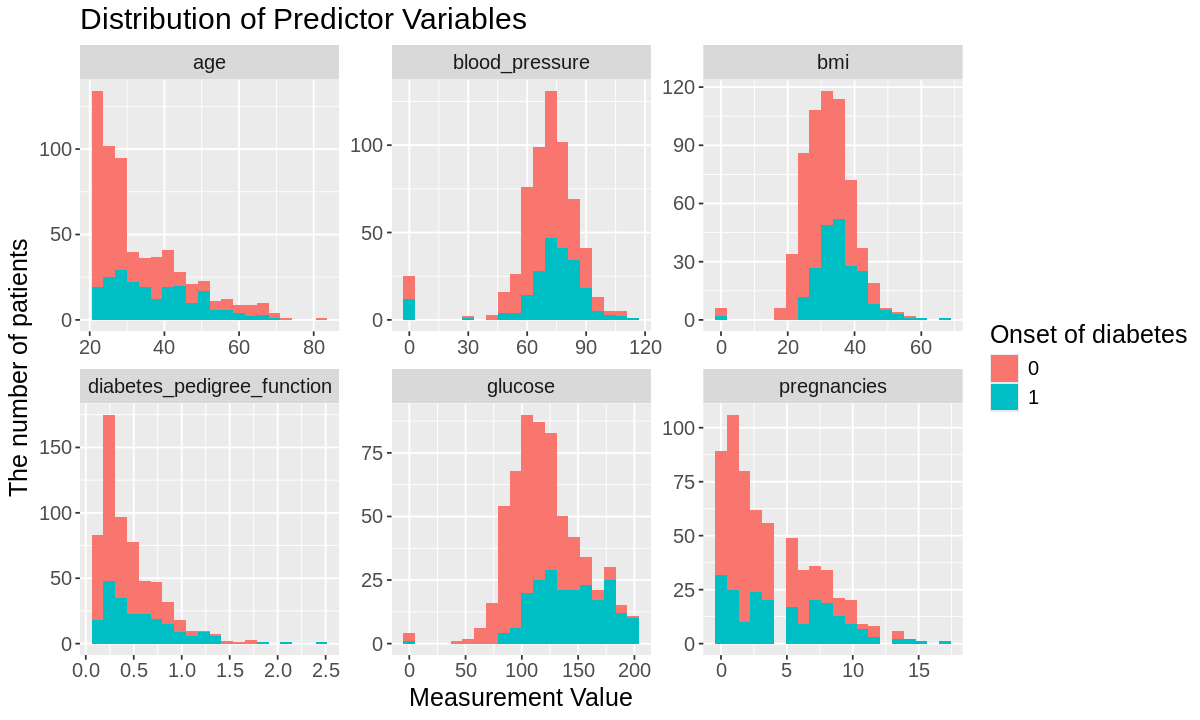

In [87]:
options(repr.plot.width = 10, repr.plot.height = 6)
# plot the distribution of each of the variables
distri <- diabetes_train |>
  select(pregnancies, glucose, blood_pressure, bmi, diabetes_pedigree_function, age, outcome)|>
  pivot_longer(cols = pregnancies:age) |>
  ggplot(aes(x = value, fill = outcome)) +
  geom_histogram(bins = 20) +
  facet_wrap(~ name, scales = "free") +
  labs(title = "Distribution of Predictor Variables", y = "The number of patients", x = "Measurement Value", fill = "Onset of diabetes") +
  theme(text = element_text(size = 15))
distri

# Classification and Results

We will answer our question by creating a classifaction model based on pregnancies, glucose, blood pressure,	skin sickness, insulin,	bmi and diabetes pedigree function

First, we need to decide which k value yields the best accuracy. To do this we will perform a 5-fold cross validation with K values ranging from 1 to 25. We chose ranges from 1- 25 since we believe it is a wide enoguh range to find a good K value and chose to use 5 folds since it is enough accuraccy for out project.

## Find the most accurate K

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7329068,5,0.013896895,Preprocessor1_Model01
4,accuracy,binary,0.7263495,5,0.011877441,Preprocessor1_Model02
7,accuracy,binary,0.7426763,5,0.009436978,Preprocessor1_Model03
10,accuracy,binary,0.7475676,5,0.005619930,Preprocessor1_Model04
13,accuracy,binary,0.7573504,5,0.004458929,Preprocessor1_Model05
16,accuracy,binary,0.7605758,5,0.007167269,Preprocessor1_Model06
19,accuracy,binary,0.7687325,5,0.011648811,Preprocessor1_Model07
22,accuracy,binary,0.7622151,5,0.010716625,Preprocessor1_Model08
25,accuracy,binary,0.7492336,5,0.010779215,Preprocessor1_Model09


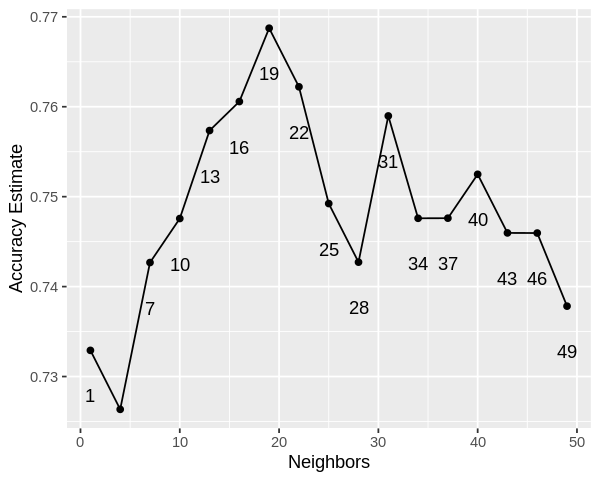

In [188]:
set.seed(123) #do not change the value.

options(repr.plot.height = 4, repr.plot.width = 5)
# create recipe using selected variables as predictors
diabetes_mnist_recipe <- recipe(outcome ~ pregnancies + glucose + bmi + blood_pressure + diabetes_pedigree_function + age, data = diabetes_train) |>
                        step_upsample(outcome, over_ratio = 1) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())
#
# create 5 fold cross validation
diabetes_mnist_vfold <- vfold_cv(diabetes_train, v = 5, strata = outcome)

# create the KNN spec to determine most accurate K value
diabetes_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# get the results of the prediction where K is between 1 and 50
diabetes_knn_results <- workflow() |>
                 add_recipe(diabetes_mnist_recipe) |>
                 add_model(diabetes_knn_spec) |>  
                 tune_grid(resamples = diabetes_mnist_vfold, grid = tibble(neighbors = seq(1, 50, by = 3))) |>
                 collect_metrics() |>
                 filter(.metric == 'accuracy')
diabetes_knn_results
# plot the results/accuracies of the K values
diabetes_cross_val_plot <- ggplot(diabetes_knn_results, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  geom_text(aes(label = neighbors), vjust = 4) + 
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') 

diabetes_cross_val_plot

From the graph we can see that k = 19 gets the best accuracy, so we will use k = 19 to train our classification model. Next we will train another classification model with k = 19. This model will help predict if a patient has diabetes or not.

## Train our model

In [189]:
set.seed(123) #do not change the value.

# create knn spec with k = 22
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) |>
            set_engine("kknn") |>
            set_mode("classification")

#knn_recipe <- recipe(outcome ~ ., data = diabetes_train) |>
                        #step_scale(all_predictors()) |>
                        #step_center(all_predictors())

knn_fit <- workflow() |>
                    add_recipe(diabetes_mnist_recipe) |>
                    add_model(knn_spec) |>
                    fit(data = diabetes_train)
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_upsample()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(19,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.21125
Best kernel: rectangular
Best k: 19

## Evaluating classifier performance

Now that we have the model trained, lets assess the accuracy and precision of our model using our testing data.

In [196]:
set.seed(123) #do not change the value.

diabetes_test_predictions <- predict(knn_fit, diabetes_test) |>
  bind_cols(diabetes_test) #add the column of predictions to the original test data.
head(diabetes_test_predictions)

diabetes_accuracy <- diabetes_test_predictions |>
  metrics(truth = outcome, estimate = .pred_class) |>
  filter(.metric == "accuracy")

diabetes_accuracy

.pred_class,pregnancies,glucose,blood_pressure,skin_sickness,insulin,bmi,diabetes_pedigree_function,age,outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,148,72,35,0,33.6,0.627,50,1
1,0,137,40,35,168,43.1,2.288,33,1
0,3,78,50,32,88,31.0,0.248,26,1
1,2,197,70,45,543,30.5,0.158,53,1
1,10,139,80,0,0,27.1,1.441,57,0
0,7,100,0,0,0,30.0,0.484,32,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7337662


It looks like our model has an accuracy of around 73%. 

## Compute the precision and recall

In [191]:
# Lets first check the order of labels in outcome.
label_order <- diabetes_test_predictions |> pull(outcome) |> levels()
label_order

[1] "0" "1"

since 1 (has diabetes) is the second label, we'll set the "positive" outcome as the second level when computing precision and recall.

In [195]:
diabetes_precision <- diabetes_test_predictions |>
  precision(truth = outcome, estimate = .pred_class, event_level = "second")
diabetes_precision

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6065574


In [194]:
diabetes_recall <- diabetes_test_predictions |>
  recall(truth = outcome, estimate = .pred_class, event_level = "second")
diabetes_recall

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.6851852


The output shows that the estimate precision of the classifier is 60% and the estimated recall of the classifier is 68%.

## Confusion Matrix

In [197]:
confusion <- diabetes_test_predictions |>
             conf_mat(truth = outcome, estimate = .pred_class)
confusion

          Truth
Prediction  0  1
         0 76 17
         1 24 37

It looks like our classification model is doing a really poor job at diagnosing people that has diabetes with diabetes but is doing fairly well with predicting if a patient doesn't have diabetes. This might be partly because we have significantly more people that don't have diabetes in our dataset that might be affecting how our model is being trained.

## Analyze performance

Lets see if our accuracy, precision and recall is actually good by comparing it agains the majority classifier. Our goal is to improve on the accuracy from just guessing from the majority outcome label from our training data (0, doesn't have diabetes). Recall that our dataset proportions are as follows:

In [198]:
diebetes_proportions <- diabetes_train |>
                      group_by(outcome) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(diabetes_train))

diebetes_proportions

outcome,n,percent
<fct>,<int>,<dbl>
0,400,65.14658
1,214,34.85342


Since the majority is 0, we can suspect that the majority classifier would have an accuracy of around 65%. The classification model we build improved on that with an accuracy of around 80%.

# Discussion
- summarize what you found
- discuss whether this is what you expected to find
- discuss what impact could such findings have
- discuss what future questions could this lead to

# Bibliography  * Center for Disease Control and Prevention (2023). CDC
  https://www.cdc.gov/diabetes/basics/diabetes.html#:~:text=Diabetes%20is%20a%20chronic%20
* Pima Indians Diabetes Database (n.d.). Kaggle
  https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv
* The creators of the Pima Indians Diabetes database:
  Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.Press. 
